# Battle of Neighborhoods

Welcome to the project 'Battle of Neighborhoods'. 
This project will analyze districts in Hong Kong and finally give a recommendation to the most favorable place to open a restaurant.

In [15]:
import pandas as pd
import numpy as np

### Define Foursquare Credentials

In [1]:
CLIENT_ID = 'XKST23GYKO12USTTKD1FWC0VUFFR5S2LYBP3LEEA5PHBMECJ' # your Foursquare ID
CLIENT_SECRET = '4LQXA2CBREEOBKIRENWDAYC1OTANYFDNNHVDVM25HOYVN2F4' # your Foursquare Secret
VERSION = '20190823' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XKST23GYKO12USTTKD1FWC0VUFFR5S2LYBP3LEEA5PHBMECJ
CLIENT_SECRET:4LQXA2CBREEOBKIRENWDAYC1OTANYFDNNHVDVM25HOYVN2F4


In [2]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

### Scrap the districts information from wikipedia

In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/Districts_of_Hong_Kong"
html = urlopen(url)

In [8]:
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr')
print(rows[:10])

[<tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold">Districts of Hong Kong<br/><style data-mw-deduplicate="TemplateStyles:r886047488">.mw-parser-output .nobold{font-weight:normal}</style><span class="nobold"><span lang="zh-Hant" title="Chinese language text">香港地區</span></span></th></tr>, <tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Map_of_Hong_Kong_18_Districts_en.svg"><img alt="Map of Hong Kong 18 Districts en.svg" data-file-height="1083" data-file-width="1454" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/250px-Map_of_Hong_Kong_18_Districts_en.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/375px-Map_of_Hong_Kong_18_Districts_en.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/500px-Map_of_Hong_Kong_18_Districts_en.svg.png 2x" width="25

In [9]:
# td: find all cells in a row
row_td = []
for row in rows:
    row_td.append(row.find_all('td'))
len(row_td)

62

In [10]:
row_td

[[],
 [<td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Map_of_Hong_Kong_18_Districts_en.svg"><img alt="Map of Hong Kong 18 Districts en.svg" data-file-height="1083" data-file-width="1454" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/250px-Map_of_Hong_Kong_18_Districts_en.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/375px-Map_of_Hong_Kong_18_Districts_en.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/500px-Map_of_Hong_Kong_18_Districts_en.svg.png 2x" width="250"/></a><div style="font-size: 85%;"><div>
  <table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:100%;">
  <tbody><tr>
  <td style="text-align: left; vertical-align: top;">
  <p>1. <a class="mw-redirect" href="/wiki/Islands_District,_

In [11]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[[], [



1. Islands
2. Kwai Tsing
3. North
4. Sai Kung
5. Sha Tin
6. Tai Po
7. Tsuen Wan
8. Tuen Mun
9. Yuen Long
10. Kowloon City
11. Kwun Tong
12. Sham Shui Po
13. Wong Tai Sin
14. Yau Tsim Mong
15. Central & Western
16. Eastern
17. Southern
18. Wan Chai

, 
1. Islands
2. Kwai Tsing
3. North
4. Sai Kung
5. Sha Tin
6. Tai Po
7. Tsuen Wan
8. Tuen Mun
9. Yuen Long
10. Kowloon City
11. Kwun Tong
12. Sham Shui Po
13. Wong Tai Sin
14. Yau Tsim Mong
15. Central & Western
16. Eastern
17. Southern
18. Wan Chai

], [
1. Islands
2. Kwai Tsing
3. North
4. Sai Kung
5. Sha Tin
6. Tai Po
7. Tsuen Wan
8. Tuen Mun
9. Yuen Long
10. Kowloon City
11. Kwun Tong
12. Sham Shui Po
13. Wong Tai Sin
14. Yau Tsim Mong
15. Central & Western
16. Eastern
17. Southern
18. Wan Chai

], [Unitary unit], [Hong Kong], [18 districts], [137,122 (Islands) – 607,544  (Sha Tin)], [10 km2 (4 sq mi) (Yau Tsim Mong) – 220 km2 (84 sq mi) (North)], [Central government], [Constituency], [], [
Politics and government of Hong Kong

In [23]:
clean = cleantext.split('],')
len(clean)

62

In [30]:
clean = clean[22:41]

In [31]:
df = pd.DataFrame(clean)

In [41]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[Central and Western,中西區,244,600,12.44,19,983.92,Hong Kong Island\n
1,[Eastern,東區,574,500,18.56,31,217.67,Hong Kong Island\n
2,[Southern,南區,269,200,38.85,6,962.68,Hong Kong Island\n
3,[Wan Chai,灣仔區,150,900,9.83,15,300.10,Hong Kong Island\n
4,[Sham Shui Po,深水埗區,390,600,9.35,41,529.41,Kowloon\n
5,[Kowloon City,九龍城區,405,400,10.02,40,194.70,Kowloon\n
6,[Kwun Tong,觀塘區,641,100,11.27,56,779.05,Kowloon\n
7,[Wong Tai Sin,黃大仙區,426,200,9.30,45,645.16,Kowloon\n
8,[Yau Tsim Mong,油尖旺區,318,100,6.99,44,864.09,Kowloon\n
9,[Islands,離島區,146,900,175.12,825.14,New Territories\n,None


In [42]:
df1.drop(columns = [1,2,3,5,6],inplace = True)

In [44]:
df1.columns = ['District','Area','Region']

In [72]:
df1 = df1.dropna(axis=0, how='any')

In [50]:
df1.Region= df1.Region.str.strip(' \n')
df1.District= df1.District.str.strip(' [')

In [52]:
df1.groupby('Region').count()

,District,Area
Region,,
Hong Kong Island,4,4
Kowloon,5,5
New Territories,8,8


In [61]:
# turn area into float type
df1.Area = df1.Area.astype(float)
df1.groupby('Region').sum()

,Area
Region,
Hong Kong Island,79.68
Kowloon,46.93
New Territories,777.52


This can give us an overview of HK districts: all districts belong to three regions, and New Territories is the largest region.

### Use geopy to get the coordinates of each district

In [ ]:
!pip install geopy
print('installed geopy')

In [ ]:
!pip install folium
print('installed folium')

In [3]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [73]:
lat = []
lng=[]
for district in df1.District:
    address = district + ', HK'

    geolocator = Nominatim(user_agent="KD")
    location = geolocator.geocode(address)
    latitude_kc = location.latitude
    longitude_kc = location.longitude
    lat.append(latitude_kc)
    lng.append(longitude_kc)

In [76]:
# one of the coordinates is obviously wrong, so replace it later
address = 'Southern, HK'

geolocator = Nominatim(user_agent="KD")
location = geolocator.geocode(address)
latitude_kc = location.latitude
longitude_kc = location.longitude
print('The geograpical coordinate of Southern are {}, {}.'.format(latitude_kc, longitude_kc))

The geograpical coordinate of Southern are 55.5432928, 9.6883321.


In [77]:
lat[2]=22.1450
lng[2]=114.0932

In [78]:
data_tuples = list(zip(lat,lng))
coor = pd.DataFrame(data_tuples, columns=['lat','lng'])

In [84]:
df1

,District,Area,Region
0,Central and Western,12.44,Hong Kong Island
1,Eastern,18.56,Hong Kong Island
2,Southern,38.85,Hong Kong Island
3,Wan Chai,9.83,Hong Kong Island
4,Sham Shui Po,9.35,Kowloon
5,Kowloon City,10.02,Kowloon
6,Kwun Tong,11.27,Kowloon
7,Wong Tai Sin,9.30,Kowloon
8,Yau Tsim Mong,6.99,Kowloon
10,Kwai Tsing,23.34,New Territories


In [ ]:
df1 = df1.join(coor, how='outer')

In [89]:
# drop the district that has no information
hkdf = df1.dropna(axis=0, how='any')

In [90]:
hkdf

,District,Area,Region,lat,lng
0,Central and Western,12.44,Hong Kong Island,22.285345,114.150452
1,Eastern,18.56,Hong Kong Island,22.273280,114.233118
2,Southern,38.85,Hong Kong Island,22.145000,114.093200
3,Wan Chai,9.83,Hong Kong Island,22.277465,114.173026
4,Sham Shui Po,9.35,Kowloon,22.330095,114.160940
5,Kowloon City,10.02,Kowloon,22.331013,114.190366
6,Kwun Tong,11.27,Kowloon,22.312126,114.226501
7,Wong Tai Sin,9.30,Kowloon,22.342063,114.194388
8,Yau Tsim Mong,6.99,Kowloon,22.318775,114.161839
10,Kwai Tsing,23.34,New Territories,22.350627,114.184916


## Get the venue information in each district

In [93]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
hk_venues = getNearbyVenues(names=hkdf['District'],
                                   latitudes=hkdf['lat'],
                                   longitudes=hkdf['lng'])

Central and Western
Eastern
Southern
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Kwai Tsing
North
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun


In [97]:
hk_venues.head(100)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central and Western,22.285345,114.150452,La Crêperie,22.285252,114.150978,Creperie
1,Central and Western,22.285345,114.150452,Coco Espresso,22.285117,114.152466,Coffee Shop
2,Central and Western,22.285345,114.150452,Yardbird,22.287076,114.149177,Japanese Restaurant
3,Central and Western,22.285345,114.150452,Te Quiero Mucho,22.284753,114.150635,Mexican Restaurant
4,Central and Western,22.285345,114.150452,Ronin,22.284525,114.152430,Japanese Restaurant
5,Central and Western,22.285345,114.150452,Monsieur Chatté,22.286218,114.150621,Wine Shop
6,Central and Western,22.285345,114.150452,Mammy Pancake (媽咪雞蛋仔),22.285685,114.151850,Snack Place
7,Central and Western,22.285345,114.150452,Frantzén's Kitchen by Björn Frantzén,22.284808,114.148220,Scandinavian Restaurant
8,Central and Western,22.285345,114.150452,Why 50,22.285155,114.151289,Café
9,Central and Western,22.285345,114.150452,Oddies Foodies,22.284291,114.151980,Ice Cream Shop


In [99]:
hk_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Central and Western,100,100,100,100,100,100
Eastern,1,1,1,1,1,1
Kowloon City,69,69,69,69,69,69
Kwai Tsing,4,4,4,4,4,4
Kwun Tong,65,65,65,65,65,65
North,54,54,54,54,54,54
Sai Kung,60,60,60,60,60,60
Sha Tin,47,47,47,47,47,47
Sham Shui Po,38,38,38,38,38,38


In [100]:
# one hot encoding
hk_onehot = pd.get_dummies(hk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hk_onehot['Neighbourhood'] = hk_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [hk_onehot.columns[-1]] + list(hk_onehot.columns[:-1])
hk_onehot.head()

,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central and Western
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central and Western
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central and Western
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central and Western
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central and Western


In [101]:
hk_grouped = hk_onehot.groupby('Neighbourhood').mean().reset_index()
hk_grouped

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0.01,0.000000,0.010000,0.010000,0.000000,0.000000,0.01,0.010000,0.000000,...,0.000000,0.020000,0.020000,0.02,0.03,0.010000,0.00,0.000000,0.00,0.000000
1,Eastern,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
2,Kowloon City,0.00,0.000000,0.000000,0.028986,0.000000,0.000000,0.00,0.000000,0.028986,...,0.000000,0.000000,0.014493,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
3,Kwai Tsing,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
4,Kwun Tong,0.00,0.000000,0.015385,0.000000,0.000000,0.000000,0.00,0.015385,0.015385,...,0.000000,0.015385,0.015385,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
5,North,0.00,0.018519,0.000000,0.000000,0.000000,0.000000,0.00,0.018519,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.018519,0.00,0.000000,0.00,0.000000
6,Sai Kung,0.00,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.016667,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
7,Sha Tin,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
8,Sham Shui Po,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.026316,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000
9,Tai Po,0.00,0.000000,0.000000,0.017544,0.000000,0.000000,0.00,0.000000,0.000000,...,0.017544,0.000000,0.017544,0.00,0.00,0.000000,0.00,0.017544,0.00,0.000000


In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [105]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = hk_grouped['Neighbourhood']

for ind in np.arange(hk_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hk_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,Café,Japanese Restaurant,Coffee Shop,Cocktail Bar,French Restaurant,Indian Restaurant,Chinese Restaurant,Wine Bar,Bar,Italian Restaurant
1,Eastern,Bus Stop,Zoo,Gastropub,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flea Market,Fish & Chips Shop
2,Kowloon City,Thai Restaurant,Dessert Shop,Café,Chinese Restaurant,Fast Food Restaurant,Cha Chaan Teng,Coffee Shop,Halal Restaurant,Bakery,Noodle House
3,Kwai Tsing,Scenic Lookout,Sushi Restaurant,Nature Preserve,Trail,Zoo,Fish & Chips Shop,French Restaurant,Food Truck,Food Court,Flea Market
4,Kwun Tong,Chinese Restaurant,Café,Coffee Shop,Cha Chaan Teng,Hong Kong Restaurant,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Department Store


### Cluster the neighbourhoods

In [114]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

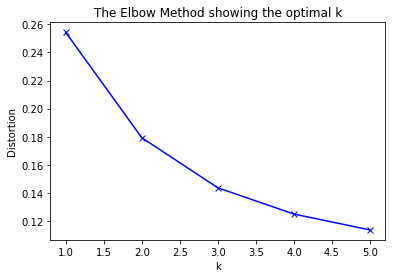

In [116]:
hk_grouped_clustering = hk_grouped.drop('Neighbourhood', 1)
distortions = []
K = range(1,6)
# set number of clusters
for k in K:
    clusterNum = k
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(hk_grouped_clustering)
    labels = k_means.labels_
    distortions.append(sum(np.min(cdist(hk_grouped_clustering, k_means.cluster_centers_, 'euclidean'), axis=1)) / hk_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

2 is the best choice of cluster number

In [117]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(hk_grouped_clustering)
labels = k_means.labels_

In [124]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', k_means.labels_)
hk_merged = hkdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hk_merged = hk_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='District')

hk_merged.head() # check the last columns!

,District,Area,Region,lat,lng,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central and Western,12.44,Hong Kong Island,22.285345,114.150452,0.0,Café,Japanese Restaurant,Coffee Shop,Cocktail Bar,French Restaurant,Indian Restaurant,Chinese Restaurant,Wine Bar,Bar,Italian Restaurant
1,Eastern,18.56,Hong Kong Island,22.273280,114.233118,1.0,Bus Stop,Zoo,Gastropub,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flea Market,Fish & Chips Shop
2,Southern,38.85,Hong Kong Island,22.145000,114.093200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wan Chai,9.83,Hong Kong Island,22.277465,114.173026,0.0,Café,Coffee Shop,Italian Restaurant,Hotel,Hong Kong Restaurant,Thai Restaurant,Chinese Restaurant,Bar,Bakery,Cantonese Restaurant
4,Sham Shui Po,9.35,Kowloon,22.330095,114.160940,0.0,Chinese Restaurant,Noodle House,Dessert Shop,Hong Kong Restaurant,Italian Restaurant,Snack Place,Dumpling Restaurant,Indonesian Restaurant,Café,Cha Chaan Teng


In [126]:
hk_merged = hk_merged.dropna()

### Plot the clusters on map

In [130]:
# create map
address = 'Hong Kong'

geolocator = Nominatim(user_agent="KD")
location = geolocator.geocode(address)
lat = location.latitude
lng = location.longitude
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hk_merged['lat'], hk_merged['lng'], hk_merged['District'], hk_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analyze each cluster

In [132]:
hk_merged.loc[hk_merged['Cluster_Labels'] == 0, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Area,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.44,0.0,Café,Japanese Restaurant,Coffee Shop,Cocktail Bar,French Restaurant,Indian Restaurant,Chinese Restaurant,Wine Bar,Bar,Italian Restaurant
3,9.83,0.0,Café,Coffee Shop,Italian Restaurant,Hotel,Hong Kong Restaurant,Thai Restaurant,Chinese Restaurant,Bar,Bakery,Cantonese Restaurant
4,9.35,0.0,Chinese Restaurant,Noodle House,Dessert Shop,Hong Kong Restaurant,Italian Restaurant,Snack Place,Dumpling Restaurant,Indonesian Restaurant,Café,Cha Chaan Teng
5,10.02,0.0,Thai Restaurant,Dessert Shop,Café,Chinese Restaurant,Fast Food Restaurant,Cha Chaan Teng,Coffee Shop,Halal Restaurant,Bakery,Noodle House
6,11.27,0.0,Chinese Restaurant,Café,Coffee Shop,Cha Chaan Teng,Hong Kong Restaurant,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Department Store
7,9.30,0.0,Coffee Shop,Fast Food Restaurant,Temple,Cantonese Restaurant,Park,Chinese Restaurant,Shopping Mall,Szechuan Restaurant,Astrologer,Pool
8,6.99,0.0,Coffee Shop,Japanese Restaurant,Noodle House,Café,Fast Food Restaurant,Clothing Store,Hotpot Restaurant,Vietnamese Restaurant,Shanghai Restaurant,Hotel
10,23.34,0.0,Scenic Lookout,Sushi Restaurant,Nature Preserve,Trail,Zoo,Fish & Chips Shop,French Restaurant,Food Truck,Food Court,Flea Market
11,136.61,0.0,Seafood Restaurant,Café,Thai Restaurant,Coffee Shop,Italian Restaurant,Chinese Restaurant,Burger Joint,Park,Pub,Pizza Place
12,129.65,0.0,Shopping Mall,Café,Chinese Restaurant,Dessert Shop,Cantonese Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Clothing Store,Fast Food Restaurant


In [134]:
hk_merged.loc[hk_merged['Cluster_Labels'] == 1, hk_merged.columns[[1] + list(range(5, hk_merged.shape[1]))]]

,Area,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,18.56,1.0,Bus Stop,Zoo,Gastropub,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Flea Market,Fish & Chips Shop


From the cluster details, we can see that the first cluster contains most of the districts. Restaurants, coffee shop and shopping mall have the highest presence.
In the second cluster, there is actually only one district, which is the Eastern. This may be because of the small number of districts and limited data volumn. It seems that the Eastern district is a relatively wilder place, with less entertainment venues and more public facilities.

However, Eastern district actually has a very promising future development. Many big companies are planning to move their headquaters to this district. The prospect is great for opening a restaurant there. Also, because there aren't too many compatitors in this district, it is also easier for a self-owned start-up restaurant.